<a href="https://colab.research.google.com/github/valmsmith39a/prof-x-colab/blob/main/prof_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!rm -r sample_data
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)



rm: cannot remove 'sample_data': No such file or directory
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 h

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


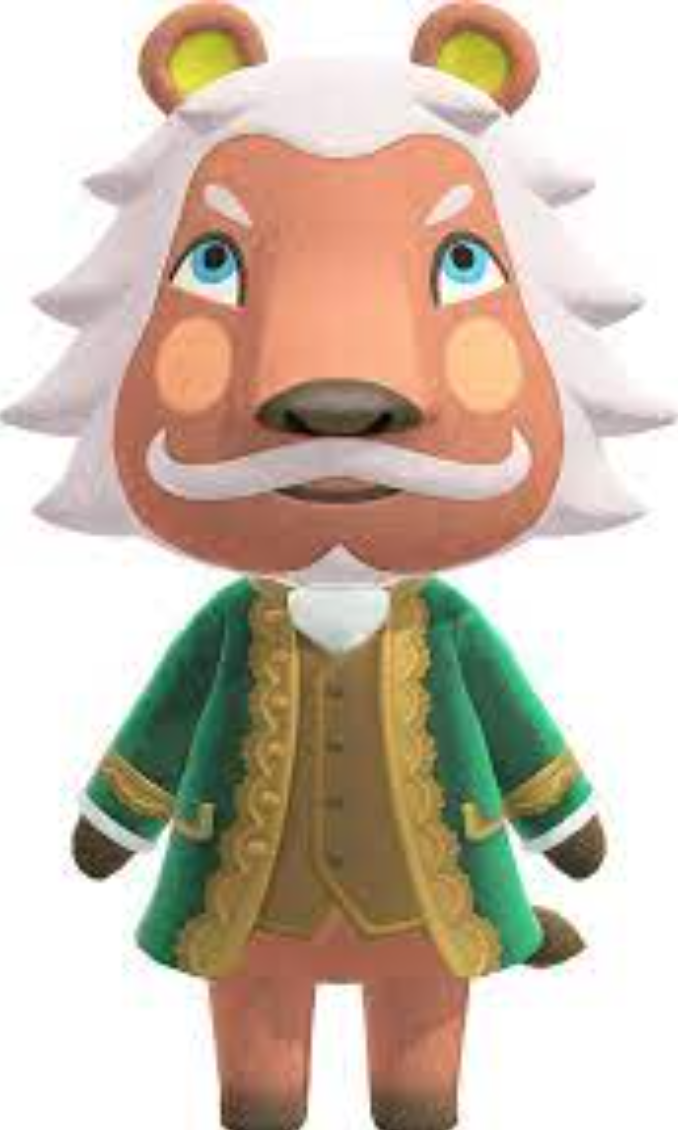

In [12]:
from selenium.webdriver.common.action_chains import ActionChains
driver.get("https://thispersondoesnotexist.com/")
# import time 
# time.sleep(5)
# face = driver.find_element_by_id('face')
# print(face)
# time.sleep(4)
from IPython.display import Image
Image('lionel.png')

In [16]:
prompt = input("Ask this person a question: ")

from selenium.webdriver.common.keys import Keys
driver.get("http://textsynth.org/")
driver.implicitly_wait(10)

inputElement = driver.find_element_by_id('input_text')
inputElement.click()
inputElement.clear()
inputElement.send_keys(prompt)
button = driver.find_element_by_id('submit_button')
ActionChains(driver).move_to_element(button).click(button).perform()
time.sleep(10)

responseElement = driver.find_element_by_id('gtext')
response = responseElement.text
response = response[len(prompt):].replace('\n', ' ')
print(response)

Ask this person a question: what is your name?
  Yusuke: I'm Yusuke and I've been playing video games for more than seven years. But I wasn't playing them


In [13]:
!git clone https://github.com/NVIDIA/flowtron.git
%cd flowtron
!git submodule update --init
%cd tacotron2
!git submodule update --init
%cd ..

# Create a virtual env so we can run different versions of packages 
# required for different repositories used in this notebook.
!pip install virtualenv
!virtualenv flowtronenv
!source flowtronenv/bin/activate; pip install numpy==1.16.4 inflect==0.2.5 librosa==0.6.0 scipy==1.0.0 tensorboardX==1.1 Unidecode==1.0.22 pillow matplotlib numba==0.48; pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# Download the pre-trained models.
!wget -N  -q https://raw.githubusercontent.com/yhgon/colab_utils/master/gfile.py
!mkdir models
!python gfile.py -u 'https://drive.google.com/open?id=1KhJcPawFgmfvwV7tQAOeC253rYstLrs8' -f 'models/flowtron_libritts.pt'
!python gfile.py -u 'https://drive.google.com/open?id=1Cjd6dK_eFz6DE0PKXKgKxrzTUqzzUDW-' -f 'models/flowtron_ljs.pt'
!python gfile.py -u 'https://drive.google.com/open?id=1Rm5rV5XaWWiUbIpg5385l5sh68z2bVOE' -f 'models/waveglow_256channels_v4.pt'

Cloning into 'flowtron'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 219 (delta 22), reused 28 (delta 14), pack-reused 174
Receiving objects: 100% (219/219), 2.83 MiB | 16.76 MiB/s, done.
Resolving deltas: 100% (94/94), done.
/content/flowtron
Submodule 'apex' (https://github.com/NVIDIA/apex) registered for path 'apex'
Submodule 'tacotron2' (https://github.com/NVIDIA/tacotron2) registered for path 'tacotron2'
Cloning into '/content/flowtron/apex'...
Cloning into '/content/flowtron/tacotron2'...
Submodule path 'apex': checked out '9165b27fdf240f9bc08eac98b849a9d7c6308917'
Submodule path 'tacotron2': checked out '6f435f7f29c3e1553cf2dd7ca2daf56903b20c39'
/content/flowtron/tacotron2
Submodule 'waveglow' (https://github.com/NVIDIA/waveglow) registered for path 'waveglow'
Cloning into '/content/flowtron/tacotron2/waveglow'...
Submodule path 'waveglow': checked out '2fd4e63e2918012f55ea

In [17]:
tts_text = response.replace('\n',' ').replace('"','')
print(tts_text)
!source flowtronenv/bin/activate; python inference.py -c config.json -f models/flowtron_ljs.pt -w models/waveglow_256channels_v4.pt -t "$tts_text" -i 0

!cp './results/sid0_sigma0.5.wav' ./..
%cd ..
!mv './sid0_sigma0.5.wav' './speech.wav'

from IPython.display import Audio
sound_file = './results/sid0_sigma0.5.wav'
Audio(sound_file, autoplay=True)

  Yusuke: I'm Yusuke and I've been playing video games for more than seven years. But I wasn't playing them
/bin/bash: flowtronenv/bin/activate: No such file or directory
python3: can't open file 'inference.py': [Errno 2] No such file or directory
cp: cannot stat './results/sid0_sigma0.5.wav': No such file or directory
/content
mv: cannot stat './sid0_sigma0.5.wav': No such file or directory


ValueError: ignored

In [14]:
%cd /content
!git clone https://github.com/Rudrabha/LipGAN.git   --branch fully_pythonic --single-branch
%cd LipGAN
!pip install git+https://www.github.com/keras-team/keras-contrib.git; pip uninstall -y tensorflow tensorflow-gpu; pip install -U numpy; pip install tensorflow-gpu==1.14.0; pip install -U scipy
  
# Download the pre-trained LipGAN model and the Face Detector file
!wget -N  -q https://raw.githubusercontent.com/yhgon/colab_utils/master/gfile.py
!python gfile.py -u 'https://drive.google.com/open?id=1DtXY5Ei_V6QjrLwfe7YDrmbSCDu6iru1' -f './logs/lipgan_residual_mel.h5'
!wget 'http://dlib.net/files/mmod_human_face_detector.dat.bz2' -P './logs/'
!bunzip2 './logs/mmod_human_face_detector.dat.bz2'  

/content
Cloning into 'LipGAN'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 133 (delta 71), reused 95 (delta 46), pack-reused 0
Receiving objects: 100% (133/133), 478.31 KiB | 9.96 MiB/s, done.
Resolving deltas: 100% (71/71), done.
/content/LipGAN
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-ojzy6zvy
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-ojzy6zvy
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp37-none-any.whl size=101065 sha256=ba9495882a91ca4ee6e21624078120d64655fba89e423438c508de30536e7f88
  Stored in directory: /tmp/pip-ephem-wheel-cache-ybywty11/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib
Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1
  Using cached https://files.pythonhost

It took  1.66sec to download 189.8 MB ./logs/lipgan_residual_mel.h5 
--2021-05-21 03:38:37--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘./logs/mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  --.-KB/s    in 0.08s   

2021-05-21 03:38:37 (8.60 MB/s) - ‘./logs/mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [15]:
%cd /content/LipGAN
!python batch_inference.py --checkpoint_path logs/lipgan_residual_mel.h5 --model residual --face "/content/person.jpg" --audio /content/speech.wav --results_dir /content

!ffmpeg -i /content/result_voice.avi /content/result_voice.mp4
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video controls><source src="%s" type="video/mp4"></video>""" % data_url)

/content/LipGAN
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

FileNotFoundError: ignored